## Objective-To predict the products quantity purchase for next month using machine learning modelling

## Importing packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import math

import statsmodels.tsa.holtwinters as ets

## Reading data from system 

In [2]:
df=pd.read_excel(r'C:\Users\Asus\parkway\modelfinal.xlsx')

In [3]:
df.head()

,ITEM ID,Total Sale Qty,UCP,Unit,Date,Total Cost,pack
0,INJM2884,20,371.5000,BGS,2019-03-01,7430.00,2
1,INJM2884,60,371.5000,BGS,2019-04-01,22290.00,2
2,INJM2884,28,568.3025,BGS,2019-05-01,15912.47,2
3,INJM2884,44,408.2800,BGS,2019-06-01,17964.32,2
4,INJM2884,18,408.2800,BGS,2019-07-01,7349.04,2


## Dropping null values

In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

ITEM ID           0
Total Sale Qty    0
UCP               0
Unit              0
Date              0
Total Cost        0
pack              0
dtype: int64

## Extracting month from date column

In [6]:
df['month'] = df['Date'].dt.month

In [7]:
df.head()

,ITEM ID,Total Sale Qty,UCP,Unit,Date,Total Cost,pack,month
0,INJM2884,20,371.5000,BGS,2019-03-01,7430.00,2,3
1,INJM2884,60,371.5000,BGS,2019-04-01,22290.00,2,4
2,INJM2884,28,568.3025,BGS,2019-05-01,15912.47,2,5
3,INJM2884,44,408.2800,BGS,2019-06-01,17964.32,2,6
4,INJM2884,18,408.2800,BGS,2019-07-01,7349.04,2,7


In [8]:
df['month']=df['month'].astype(str)

## Creating unique Id w.r.t date and unit

In [9]:
df['unique_month']=df['ITEM ID']+df['Unit']+df['month']
df['unique_unit']=df['ITEM ID']+df['Unit']

## Dropping Duplicates

In [10]:
df = df.drop_duplicates(subset=['unique_month'])

In [11]:
df.head()

,ITEM ID,Total Sale Qty,UCP,Unit,Date,Total Cost,pack,month,unique_month,unique_unit
0,INJM2884,20,371.5000,BGS,2019-03-01,7430.00,2,3,INJM2884BGS3,INJM2884BGS
1,INJM2884,60,371.5000,BGS,2019-04-01,22290.00,2,4,INJM2884BGS4,INJM2884BGS
2,INJM2884,28,568.3025,BGS,2019-05-01,15912.47,2,5,INJM2884BGS5,INJM2884BGS
3,INJM2884,44,408.2800,BGS,2019-06-01,17964.32,2,6,INJM2884BGS6,INJM2884BGS
4,INJM2884,18,408.2800,BGS,2019-07-01,7349.04,2,7,INJM2884BGS7,INJM2884BGS


## Function that takes input data and divides it as per ABC analysis

In [12]:
def ABC(dataframe,unit):
    data1=dataframe
    data1=data1[data1['Unit'] == unit]
    data1["6 month quantity"] = data1.groupby(["ITEM ID"])["Total Sale Qty"].transform(sum)
    data1["6 month Cost"] = data1.groupby(["ITEM ID"])["Total Cost"].transform(sum)
    data1=data1.drop(['Total Cost'],axis=1)
    #data_new = data1.drop_duplicates(subset=['ITEM ID'])
    data_new = data1.reset_index()
    del data_new['index'] 
    data_new['percent']=100*data_new['6 month Cost']/data_new['6 month Cost'].sum()
    data_new=data_new.sort_values(by='percent', ascending=False)
    data_new['cum_sum_percent'] = data_new['percent'].cumsum()
    bins=[0,70,90,110]
    category_names=['A','B','C']
    data_new['categories']=pd.cut(data_new['cum_sum_percent'],bins,labels=category_names,include_lowest=True)
    data_new=data_new[['ITEM ID','unique_month','unique_unit','Date','Unit','categories','UCP','pack','month','Total Sale Qty','6 month quantity','cum_sum_percent']]
    return data_new

In [13]:
BGS=ABC(df,'BGS')
LKP=ABC(df,'LKP')
LBN=ABC(df,'LBN')
CHN=ABC(df,'CHN')
CHL=ABC(df,'CHL')
CDKD=ABC(df,'CDKD')

C:\Users\SUSHANT\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\SUSHANT\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\SUSHANT\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.p

In [14]:
print(BGS.shape)
print(LKP.shape)
print(LBN.shape)
print(CHN.shape)
print(CHL.shape)
print(CDKD.shape)

(29510, 12)
(21951, 12)
(21958, 12)
(39337, 12)
(33700, 12)
(36261, 12)


In [15]:
main_df = pd.concat([BGS, LKP,LBN,CHN,CHL,CDKD], ignore_index=True)

In [16]:
main_df=main_df.drop(['unique_month','UCP','6 month quantity'],axis=1)

In [17]:
main_df['ITEM ID']=main_df['ITEM ID'].astype(str)
main_df['categories']=main_df['categories'].astype(str)
main_df['month']=main_df['month'].astype(int)
main_df['Unit']=main_df['Unit'].astype(str)

In [18]:
main_df.head()

,ITEM ID,unique_unit,Date,Unit,categories,pack,month,Total Sale Qty,cum_sum_percent
0,INJS11418,INJS11418BGS,2019-08-01,BGS,A,2,8,18,0.618888
1,INJS11418,INJS11418BGS,2019-01-01,BGS,A,2,1,8,1.237777
2,INJS11418,INJS11418BGS,2019-02-01,BGS,A,2,2,13,1.856665
3,INJS11418,INJS11418BGS,2019-03-01,BGS,A,2,3,12,2.475553
4,INJS11418,INJS11418BGS,2019-04-01,BGS,A,2,4,5,3.094441


In [19]:
main_df.shape

(182717, 9)

In [20]:
main_df['categories'].isnull().sum()

0

## Plot for distribution of data as per 
ABC analysis

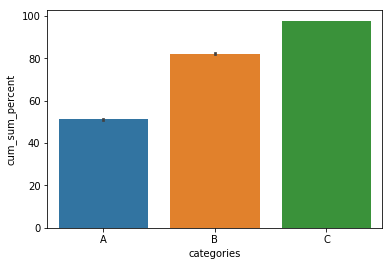

In [21]:
sns.barplot(x='categories',y='cum_sum_percent',data=main_df)

## Function for splitting data
* Half of products which is sold for less than 5 months cannot be predicted.
* So insights for those products is provided.
* While the products sold more than 4 months are used for modelling.

In [22]:
def spliting(data):
    data = data.pivot_table(index=['unique_unit','ITEM ID','Unit','categories','pack'], columns=['Date'],values="Total Sale Qty")
    data.fillna(0,inplace=True)
    data=pd.DataFrame(data)
    data=data.reset_index()
#x=pd.DataFrame(final[['Jan','Feb','Mar','April','May','June','July','Aug','Sep','Oct','Nov','Dec']])
    x=pd.DataFrame(data.drop(['unique_unit','ITEM ID','Unit','categories','pack'],axis=1))
    data['count']=(x != 0).sum(axis=1)
    model_data=data.loc[(data['count'] > 4)]
    insight=data.loc[(data['count'] <= 4) & (data['count'] > 1)]
    one=data.loc[(data['count'] == 1)]
    insight['std']=data.drop(['unique_unit','ITEM ID','Unit','categories','pack'],axis=1).std(axis=1)
    insight['mean']=data.drop(['unique_unit','ITEM ID','Unit','categories','pack'],axis=1).mean(axis=1)
    insight['CV']=insight['std']/insight['mean']
    insight2=insight.loc[(insight['CV'] < 1.52)]
    insight1=insight.loc[(insight['CV'] >= 1.52)]
    new_data=pd.concat([model_data,insight2])
    new_data=new_data.drop(['count','mean','std','CV'],axis=1)
    new_data2=pd.concat([one,insight1])
    
    return new_data,new_data2

In [23]:
data,insight_data=spliting(main_df)

C:\Users\SUSHANT\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\SUSHANT\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\SUSHANT\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

In [24]:
insight_data.head()

,ITEM ID,Unit,categories,pack,unique_unit,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,...,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,count,std,mean,CV
0,123C22238,CDKD,C,2,123C22238CDKD,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1,NaN,NaN,NaN
2,123C22255,CDKD,C,2,123C22255CDKD,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,1,NaN,NaN,NaN
4,123C22257,CDKD,C,2,123C22257CDKD,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,NaN,NaN,NaN
5,123C22259,CDKD,C,2,123C22259CDKD,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,NaN,NaN,NaN
8,123C22268,CDKD,C,2,123C22268CDKD,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,1,NaN,NaN,NaN


## Data preparation for modeling

In [25]:
insight_last=insight_data.drop(['count','mean','std','CV'],axis=1)

In [26]:
insight_last.head()

,ITEM ID,Unit,categories,pack,unique_unit,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00
0,123C22238,CDKD,C,2,123C22238CDKD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,123C22255,CDKD,C,2,123C22255CDKD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
4,123C22257,CDKD,C,2,123C22257CDKD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,123C22259,CDKD,C,2,123C22259CDKD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,123C22268,CDKD,C,2,123C22268CDKD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


In [27]:
insight_last.shape

(18498, 17)

In [28]:
insight_last1=pd.melt(insight_data, id_vars=['ITEM ID','Unit','categories','unique_unit','pack'], value_vars=list(data.columns[5:])
                  ,var_name='Date', value_name='Total Sale Qty')

In [29]:
insight_last1.head()

,ITEM ID,Unit,categories,unique_unit,pack,Date,Total Sale Qty
0,123C22238,CDKD,C,123C22238CDKD,2,2019-01-01,0.0
1,123C22255,CDKD,C,123C22255CDKD,2,2019-01-01,0.0
2,123C22257,CDKD,C,123C22257CDKD,2,2019-01-01,0.0
3,123C22259,CDKD,C,123C22259CDKD,2,2019-01-01,0.0
4,123C22268,CDKD,C,123C22268CDKD,2,2019-01-01,0.0


In [30]:
insight_last1.shape

(221976, 7)

insight_last1["TotalQuantity"] = insight_last1.groupby(["unique_unit"])["Total Sale Qty"].transform(sum)

insight_last1.head()

In [31]:
inlast= insight_last1.drop_duplicates(subset=['unique_unit'])

In [32]:
inlast.shape

(18490, 7)

In [33]:
inlast.head()

,ITEM ID,Unit,categories,unique_unit,pack,Date,Total Sale Qty
0,123C22238,CDKD,C,123C22238CDKD,2,2019-01-01,0.0
1,123C22255,CDKD,C,123C22255CDKD,2,2019-01-01,0.0
2,123C22257,CDKD,C,123C22257CDKD,2,2019-01-01,0.0
3,123C22259,CDKD,C,123C22259CDKD,2,2019-01-01,0.0
4,123C22268,CDKD,C,123C22268CDKD,2,2019-01-01,0.0


In [34]:
data.shape

(16036, 17)

In [35]:
new_data=pd.melt(data, id_vars=['ITEM ID','Unit','categories','unique_unit','pack'], value_vars=list(data.columns[5:])
                  ,var_name='Date', value_name='Total Sale Qty')

In [36]:
new_data.head()

,ITEM ID,Unit,categories,unique_unit,pack,Date,Total Sale Qty
0,48I30870,CHN,A,48I30870CHN,2,2019-01-01,0.0
1,50A0409,CDKD,C,50A0409CDKD,2,2019-01-01,43.0
2,50B0417,CDKD,B,50B0417CDKD,2,2019-01-01,1069.0
3,50D0418,CDKD,B,50D0418CDKD,2,2019-01-01,1565.0
4,50F8818,CDKD,B,50F8818CDKD,2,2019-01-01,389.0


In [37]:
new_data.shape

(192432, 7)

In [38]:
df1=new_data.pivot_table(index="Date", columns="unique_unit",values="Total Sale Qty")

In [39]:
df1

unique_unit,48I30870CHN,50A0409CDKD,50B0417CDKD,50D0418CDKD,50F8818CDKD,ANS115299BGS,ANS327777CHN,ANS327778CHN,ANSA14835LBN,ANSA17356LKP,...,WISS12250LBN,WISS16517LBN,WISS27031BGS,WIST6483CHN,WIST6485CHN,WISV12713LBN,WISW18354LKP,WISW30208CHN,grnL00162CDKD,grnR00283CDKD
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,0.0,43.0,1069.0,1565.0,389.0,52.0,0.0,6.0,3.0,1.0,...,21100.0,269.0,10.0,0.0,9.0,0.0,507.0,8.0,14.0,81.0
2019-02-01,2.0,37.0,747.0,1172.0,216.0,43.0,0.0,4.0,9.0,0.0,...,18350.0,381.0,8.0,0.0,3.0,0.0,454.0,15.0,12.0,64.0
2019-03-01,9.0,102.0,832.0,1071.0,236.0,39.0,2.0,5.0,0.0,3.0,...,9050.0,43.0,6.0,5.0,7.0,1.0,563.0,13.0,16.0,20.0
2019-04-01,1.0,128.0,827.0,1239.0,212.0,9.0,1.0,0.0,1.0,2.0,...,15300.0,196.0,9.0,7.0,1.0,1.0,555.0,7.0,20.0,71.0
2019-05-01,0.0,31.0,723.0,1046.0,317.0,30.0,0.0,3.0,0.0,1.0,...,23600.0,297.0,7.0,0.0,0.0,47.0,490.0,7.0,10.0,97.0
2019-06-01,0.0,12.0,707.0,1037.0,200.0,32.0,2.0,2.0,7.0,0.0,...,20100.0,3.0,7.0,0.0,0.0,33.0,389.0,7.0,9.0,62.0
2019-07-01,5.0,70.0,1140.0,1978.0,464.0,17.0,2.0,4.0,0.0,0.0,...,24750.0,10.0,2.0,4.0,0.0,5.0,672.0,9.0,12.0,-1.0
2019-08-01,13.0,57.0,814.0,1383.0,489.0,20.0,2.0,5.0,1.0,0.0,...,37300.0,426.0,10.0,1.0,0.0,0.0,612.0,0.0,27.0,37.0
2019-09-01,17.0,112.0,674.0,1285.0,234.0,0.0,1.0,2.0,0.0,0.0,...,18850.0,111.0,0.0,2.0,0.0,0.0,590.0,1.0,17.0,55.0


In [40]:
df1=pd.DataFrame(df1)
df1=df1.reset_index()

df1.head()

unique_unit,Date,48I30870CHN,50A0409CDKD,50B0417CDKD,50D0418CDKD,50F8818CDKD,ANS115299BGS,ANS327777CHN,ANS327778CHN,ANSA14835LBN,...,WISS12250LBN,WISS16517LBN,WISS27031BGS,WIST6483CHN,WIST6485CHN,WISV12713LBN,WISW18354LKP,WISW30208CHN,grnL00162CDKD,grnR00283CDKD
0,2019-01-01,0.0,43.0,1069.0,1565.0,389.0,52.0,0.0,6.0,3.0,...,21100.0,269.0,10.0,0.0,9.0,0.0,507.0,8.0,14.0,81.0
1,2019-02-01,2.0,37.0,747.0,1172.0,216.0,43.0,0.0,4.0,9.0,...,18350.0,381.0,8.0,0.0,3.0,0.0,454.0,15.0,12.0,64.0
2,2019-03-01,9.0,102.0,832.0,1071.0,236.0,39.0,2.0,5.0,0.0,...,9050.0,43.0,6.0,5.0,7.0,1.0,563.0,13.0,16.0,20.0
3,2019-04-01,1.0,128.0,827.0,1239.0,212.0,9.0,1.0,0.0,1.0,...,15300.0,196.0,9.0,7.0,1.0,1.0,555.0,7.0,20.0,71.0
4,2019-05-01,0.0,31.0,723.0,1046.0,317.0,30.0,0.0,3.0,0.0,...,23600.0,297.0,7.0,0.0,0.0,47.0,490.0,7.0,10.0,97.0


d['Date']=pd.to_datetime(d['Date'], infer_datetime_format=True)

In [41]:
df1.index=df1['Date']

In [42]:
df1

unique_unit,Date,48I30870CHN,50A0409CDKD,50B0417CDKD,50D0418CDKD,50F8818CDKD,ANS115299BGS,ANS327777CHN,ANS327778CHN,ANSA14835LBN,...,WISS12250LBN,WISS16517LBN,WISS27031BGS,WIST6483CHN,WIST6485CHN,WISV12713LBN,WISW18354LKP,WISW30208CHN,grnL00162CDKD,grnR00283CDKD
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,2019-01-01,0.0,43.0,1069.0,1565.0,389.0,52.0,0.0,6.0,3.0,...,21100.0,269.0,10.0,0.0,9.0,0.0,507.0,8.0,14.0,81.0
2019-02-01,2019-02-01,2.0,37.0,747.0,1172.0,216.0,43.0,0.0,4.0,9.0,...,18350.0,381.0,8.0,0.0,3.0,0.0,454.0,15.0,12.0,64.0
2019-03-01,2019-03-01,9.0,102.0,832.0,1071.0,236.0,39.0,2.0,5.0,0.0,...,9050.0,43.0,6.0,5.0,7.0,1.0,563.0,13.0,16.0,20.0
2019-04-01,2019-04-01,1.0,128.0,827.0,1239.0,212.0,9.0,1.0,0.0,1.0,...,15300.0,196.0,9.0,7.0,1.0,1.0,555.0,7.0,20.0,71.0
2019-05-01,2019-05-01,0.0,31.0,723.0,1046.0,317.0,30.0,0.0,3.0,0.0,...,23600.0,297.0,7.0,0.0,0.0,47.0,490.0,7.0,10.0,97.0
2019-06-01,2019-06-01,0.0,12.0,707.0,1037.0,200.0,32.0,2.0,2.0,7.0,...,20100.0,3.0,7.0,0.0,0.0,33.0,389.0,7.0,9.0,62.0
2019-07-01,2019-07-01,5.0,70.0,1140.0,1978.0,464.0,17.0,2.0,4.0,0.0,...,24750.0,10.0,2.0,4.0,0.0,5.0,672.0,9.0,12.0,-1.0
2019-08-01,2019-08-01,13.0,57.0,814.0,1383.0,489.0,20.0,2.0,5.0,1.0,...,37300.0,426.0,10.0,1.0,0.0,0.0,612.0,0.0,27.0,37.0
2019-09-01,2019-09-01,17.0,112.0,674.0,1285.0,234.0,0.0,1.0,2.0,0.0,...,18850.0,111.0,0.0,2.0,0.0,0.0,590.0,1.0,17.0,55.0


import statsmodels.api as sm
def model(data,i):
    d=data[i]
    train=d[0:11] 
    test=d[12:]
    y_hat_avg = test.copy()
    fit1 = sm.tsa.statespace.SARIMAX(d, order=(1,0,0)).fit()
    y_hat_avg = fit1.predict(start="2019-12-01", end="2020-01-01", dynamic=True)
    return y_hat_avg

# Modelling

* Model used for prediction is Holt-Winter's Exponential smoothing with no trend and seasonality.
* It provides 3 smoothing equation with weights at every level.

In [43]:
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
def model(data,i):
    d=data[i]
    train=d[0:11] 
    test=d[12:]
    y_hat_avg = test.copy()
    fit1 = ExponentialSmoothing(np.asarray(d) ,seasonal_periods=None ,trend=None, seasonal=None).fit()
    y_hat_avg = fit1.forecast(len(test))
    #y_hat_avg = fit1.predict(start="2019-12-01", end="2020-01-01", dynamic=True)
    return y_hat_avg

y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['grnL00162CDKD']) ,seasonal_periods=None ,trend=None, seasonal=None).fit()

y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

## Prediction for single ID

In [44]:
x=pd.DataFrame(model(df1,i='48I30870CHN'))
x

,0
0,0.0


In [45]:
e=df1.columns[1:2]
col=df1.columns[1:]
col

Index(['48I30870CHN', '50A0409CDKD', '50B0417CDKD', '50D0418CDKD',
       '50F8818CDKD', 'ANS115299BGS', 'ANS327777CHN', 'ANS327778CHN',
       'ANSA14835LBN', 'ANSA17356LKP',
       ...
       'WISS12250LBN', 'WISS16517LBN', 'WISS27031BGS', 'WIST6483CHN',
       'WIST6485CHN', 'WISV12713LBN', 'WISW18354LKP', 'WISW30208CHN',
       'grnL00162CDKD', 'grnR00283CDKD'],
      dtype='object', name='unique_unit', length=16036)

In [46]:
res=pd.DataFrame(e)

In [47]:
res

,unique_unit
0,48I30870CHN


## Applying for loop for every product 

In [48]:
for i in col:
    res[i]=model(df1,i)

In [49]:
res

,unique_unit,48I30870CHN,50A0409CDKD,50B0417CDKD,50D0418CDKD,50F8818CDKD,ANS115299BGS,ANS327777CHN,ANS327778CHN,ANSA14835LBN,...,WISS12250LBN,WISS16517LBN,WISS27031BGS,WIST6483CHN,WIST6485CHN,WISV12713LBN,WISW18354LKP,WISW30208CHN,grnL00162CDKD,grnR00283CDKD
0,48I30870CHN,0.0,68.750004,836.08334,1274.83311,310.666659,14.548674,0.916667,0.36002,1.833333,...,19616.69851,190.416666,6.166667,1.583333,1.257157,0.001909,541.916668,0.059016,14.75,55.583336


next_date=pd.DataFrame(y_hat_avg['Date'] + pd.offsets.MonthBegin(1))

In [50]:
res_transposed = res.T

In [51]:
res_transposed.drop(res_transposed.index[0],inplace=True)

In [52]:
result=res_transposed.reset_index()

In [53]:
result = result.rename(columns={0: 'prediction','index':'unique_unit'})

In [54]:
result

,unique_unit,prediction
0,48I30870CHN,0
1,50A0409CDKD,68.75
2,50B0417CDKD,836.083
3,50D0418CDKD,1274.83
4,50F8818CDKD,310.667
5,ANS115299BGS,14.5487
6,ANS327777CHN,0.916667
7,ANS327778CHN,0.36002
8,ANSA14835LBN,1.83333
9,ANSA17356LKP,0.666667


## Preparing output dataset

In [55]:
cat=pd.merge(new_data,result,on='unique_unit',how='inner')

In [56]:
cat.shape

(192432, 8)

In [57]:
cat.drop(['Date','Total Sale Qty'],axis=1,inplace=True)

In [58]:
cat1 = cat.drop_duplicates(subset=['unique_unit'])

In [59]:
cat1.head()

,ITEM ID,Unit,categories,unique_unit,pack,prediction
0,48I30870,CHN,A,48I30870CHN,2,0
12,50A0409,CDKD,C,50A0409CDKD,2,68.75
24,50B0417,CDKD,B,50B0417CDKD,2,836.083
36,50D0418,CDKD,B,50D0418CDKD,2,1274.83
48,50F8818,CDKD,B,50F8818CDKD,2,310.667


## insight modelling

In [60]:
def category(df):
    df['prediction']=df.iloc[:,-3:].sum(axis=1)
    return df

In [61]:
inlast.shape

(18490, 7)

In [62]:
final=category(insight_last)

In [63]:
final.to_excel(r'C:\Users\Asus\parkway\problem.xlsx')

In [64]:
cat2=pd.merge(inlast,final,on='unique_unit')

In [65]:
cat2.head()

,ITEM ID_x,Unit_x,categories_x,unique_unit,pack_x,Date,Total Sale Qty,ITEM ID_y,Unit_y,categories_y,...,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,prediction
0,123C22238,CDKD,C,123C22238CDKD,2,2019-01-01,0.0,123C22238,CDKD,C,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,123C22255,CDKD,C,123C22255CDKD,2,2019-01-01,0.0,123C22255,CDKD,C,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
2,123C22257,CDKD,C,123C22257CDKD,2,2019-01-01,0.0,123C22257,CDKD,C,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,123C22259,CDKD,C,123C22259CDKD,2,2019-01-01,0.0,123C22259,CDKD,C,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,123C22268,CDKD,C,123C22268CDKD,2,2019-01-01,0.0,123C22268,CDKD,C,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0


In [66]:
cat1.head()

,ITEM ID,Unit,categories,unique_unit,pack,prediction
0,48I30870,CHN,A,48I30870CHN,2,0
12,50A0409,CDKD,C,50A0409CDKD,2,68.75
24,50B0417,CDKD,B,50B0417CDKD,2,836.083
36,50D0418,CDKD,B,50D0418CDKD,2,1274.83
48,50F8818,CDKD,B,50F8818CDKD,2,310.667


In [67]:
cat2.shape

(18498, 24)

In [68]:
cat2=cat2[['ITEM ID_x','Unit_x','categories_x','unique_unit','pack_x','prediction']]

In [69]:
cat2.head()

,ITEM ID_x,Unit_x,categories_x,unique_unit,pack_x,prediction
0,123C22238,CDKD,C,123C22238CDKD,2,1.0
1,123C22255,CDKD,C,123C22255CDKD,2,0.0
2,123C22257,CDKD,C,123C22257CDKD,2,0.0
3,123C22259,CDKD,C,123C22259CDKD,2,0.0
4,123C22268,CDKD,C,123C22268CDKD,2,2.0


In [70]:
cat2.rename(columns = {'ITEM ID_x':'ITEM ID', 'Unit_x':'Unit', 
                              'categories_x':'categories','pack_x':'pack'}, inplace = True)

In [71]:
cat2.head()

,ITEM ID,Unit,categories,unique_unit,pack,prediction
0,123C22238,CDKD,C,123C22238CDKD,2,1.0
1,123C22255,CDKD,C,123C22255CDKD,2,0.0
2,123C22257,CDKD,C,123C22257CDKD,2,0.0
3,123C22259,CDKD,C,123C22259CDKD,2,0.0
4,123C22268,CDKD,C,123C22268CDKD,2,2.0


In [72]:
cat1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16036 entries, 0 to 192420
Data columns (total 6 columns):
ITEM ID        16036 non-null object
Unit           16036 non-null object
categories     16036 non-null object
unique_unit    16036 non-null object
pack           16036 non-null int64
prediction     16036 non-null object
dtypes: int64(1), object(5)
memory usage: 877.0+ KB


In [73]:
cat2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18498 entries, 0 to 18497
Data columns (total 6 columns):
ITEM ID        18498 non-null object
Unit           18498 non-null object
categories     18498 non-null object
unique_unit    18498 non-null object
pack           18498 non-null int64
prediction     18498 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1011.6+ KB


def category(df):
    moving = df['Oct']+df['Nov']+df['Dec']
    df['Moving&Non_moving'] = moving
    return df
category(insight_last)
buh=insight_last.pivot_table(index="Date", columns="unique_unit",values="Total Sale Qty")
buh
buh=pd.DataFrame(buh)
buh=buh.reset_index()
buh.head()
buh.index=buh['Date']
buh
a=pd.DataFrame(model(buh,i='WISS27710CHN'))
a

In [74]:
master=cat1.append(cat2)

In [75]:
master.shape

(34534, 6)

In [76]:
master['categories'].isnull().sum()

0

In [77]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34534 entries, 0 to 18497
Data columns (total 6 columns):
ITEM ID        34534 non-null object
Unit           34534 non-null object
categories     34534 non-null object
unique_unit    34534 non-null object
pack           34534 non-null int64
prediction     34534 non-null object
dtypes: int64(1), object(5)
memory usage: 1.8+ MB


## ROL tool kit

In [78]:
days_dict ={'A' : 7, 'B' : 9, 'C' : 20}

In [79]:
master['days']= master['categories'].map(days_dict)

In [80]:
master['prediction']=master['prediction'].astype(float)
master['days']=master['days'].astype(int)

In [81]:
master['ROL']=(master['prediction']/30)*master['days']

In [82]:
master['EOQ']=(master['prediction']/30)*(master['days']*2)

In [83]:
master.head()

,ITEM ID,Unit,categories,unique_unit,pack,prediction,days,ROL,EOQ
0,48I30870,CHN,A,48I30870CHN,2,0.000000,7,0.000000,0.000000
12,50A0409,CDKD,C,50A0409CDKD,2,68.750004,20,45.833336,91.666671
24,50B0417,CDKD,B,50B0417CDKD,2,836.083340,9,250.825002,501.650004
36,50D0418,CDKD,B,50D0418CDKD,2,1274.833110,9,382.449933,764.899866
48,50F8818,CDKD,B,50F8818CDKD,2,310.666659,9,93.199998,186.399995


In [84]:
#master.to_excel(r'C:\Users\Sushant\Downloads\haha.xlsx')

In [85]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34534 entries, 0 to 18497
Data columns (total 9 columns):
ITEM ID        34534 non-null object
Unit           34534 non-null object
categories     34534 non-null object
unique_unit    34534 non-null object
pack           34534 non-null int64
prediction     34534 non-null float64
days           34534 non-null int32
ROL            34534 non-null float64
EOQ            34534 non-null float64
dtypes: float64(3), int32(1), int64(1), object(4)
memory usage: 2.5+ MB


In [86]:
master['Cal1']=master['prediction']/master['pack']

In [87]:
master['Cal1']=master['Cal1'].astype(int)

In [88]:
master['Cal2']=(master['Cal1'] * master['pack'])

In [89]:
master.head()

,ITEM ID,Unit,categories,unique_unit,pack,prediction,days,ROL,EOQ,Cal1,Cal2
0,48I30870,CHN,A,48I30870CHN,2,0.000000,7,0.000000,0.000000,0,0
12,50A0409,CDKD,C,50A0409CDKD,2,68.750004,20,45.833336,91.666671,34,68
24,50B0417,CDKD,B,50B0417CDKD,2,836.083340,9,250.825002,501.650004,418,836
36,50D0418,CDKD,B,50D0418CDKD,2,1274.833110,9,382.449933,764.899866,637,1274
48,50F8818,CDKD,B,50F8818CDKD,2,310.666659,9,93.199998,186.399995,155,310


In [90]:
master.shape

(34534, 11)